In [1]:
#Cargamos librerias
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
import pandas as pd

In [2]:
#Cargar archivo csv desde seaborn
df= pd.read_csv('datoslimpioscreta.csv')
df.head(5)

,source,host_location,host_response_time,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_group_cleansed,property_type,room_type,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
0,city scrape,"Heraklion, Greece",within an hour,"['email', 'phone']",t,t,"Gazi, Greece",Not provided,Entire rental unit,Entire home/apt,...,4.94,4.91,4.96,4.99,4.64,4.92,3,3,0,0.82
1,city scrape,"Matala, Greece",within an hour,"['email', 'phone', 'work_email']",t,t,"Matala, Crete Island, Greece",Not provided,Private room in bed and breakfast,Private room,...,4.14,4.49,4.33,4.43,4.50,4.18,4,0,4,0.26
2,previous scrape,"Chania, Greece",within an hour,"['email', 'phone']",t,t,"Chania, Greece",Not provided,Entire rental unit,Entire home/apt,...,4.71,4.67,4.87,4.84,4.94,4.66,4,4,0,2.12
3,city scrape,Greece,within an hour,"['email', 'phone']",t,t,Not provided,Not provided,Entire rental unit,Entire home/apt,...,4.50,5.00,5.00,4.50,4.00,4.50,1,1,0,0.01
4,city scrape,"Iraklion, Greece",within an hour,"['email', 'phone']",t,t,"Agia Pelagia, Crete, Greece",Not provided,Entire rental unit,Entire home/apt,...,4.87,4.80,4.92,4.94,4.68,4.88,13,10,1,0.98


In [74]:
df.columns

Index(['source', 'host_location', 'host_response_time', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'bathrooms_text', 'instant_bookable', 'has_availability',
       'host_is_superhost', 'host_response_rate', 'host_acceptance_rate',
       'host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'availability_eoy', 'number_of_reviews_ly',
       'estimated_occupancy_l365d', 'estimated_revenue_l365d',
       'review_scores_ratin

In [214]:
df.select_dtypes(include=['number']).columns

Index(['host_is_superhost', 'host_response_rate', 'host_acceptance_rate',
       'host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'availability_eoy', 'number_of_reviews_ly',
       'estimated_occupancy_l365d', 'estimated_revenue_l365d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calcu

**HOST RESPONSE RATE**

Modelo 1

In [135]:
# Función exponencial
def func1(x, a, b, c):
    return a*np.exp(-b*x) + c
#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, df['minimum_nights'], df['host_response_rate'])


In [136]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros1

array([-0.02112278,  0.32323898,  0.98742074])

In [137]:
# Predicciones
y_pred1 = func1(x, *parametros1)
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred1

,minimum_nights_avg_ntm
0,0.979411
1,0.972132
2,0.981623
3,0.979411
4,0.983851
...,...
26159,0.979411
26160,0.979411
26161,0.980823
26162,0.984837


C:\Users\sammm\AppData\Local\Temp\ipykernel_17336\608165212.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\sammm\AppData\Local\Temp\ipykernel_17336\608165212.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y-predecida con a*np.exp(-b*x) + c", color= "red")


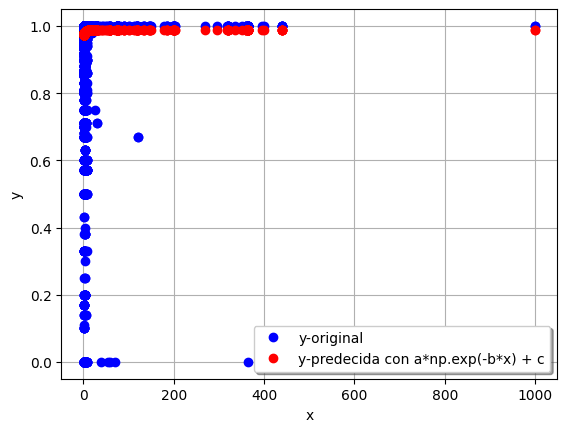

In [138]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred1,'bo', label="y-predecida con a*np.exp(-b*x) + c", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [164]:
#Correlación modelo lineal
corr1 = df['minimum_nights'].corr(df['host_response_rate'])  # correlación de Pearson entre ambas columnas
corr1

np.float64(0.009853584884769194)

In [140]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
R2_Modelo1 

0.0025149608429028136

In [165]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
R

np.float64(0.05014938526944088)

Modelo 2

In [188]:
# Función tangencial
def func2(x, a, b):
    return a*np.tan(x) + b



In [189]:
#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2, df['minimum_nights'], df['host_response_rate'])

In [190]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros2

array([-1.82671384e-04,  9.78238113e-01])

In [191]:
# Predicciones
y_pred2 = func2(x, *parametros2)

In [192]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred2

,minimum_nights_avg_ntm
0,0.978264
1,0.977954
2,0.978027
3,0.978264
4,0.978420
...,...
26159,0.978264
26160,0.978264
26161,0.978148
26162,0.978198


C:\Users\sammm\AppData\Local\Temp\ipykernel_17336\1481146549.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original" , color= "blue")
C:\Users\sammm\AppData\Local\Temp\ipykernel_17336\1481146549.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred2, 'bo', label="y-predecida con y = a*np.sin(x) + b", color= "red")


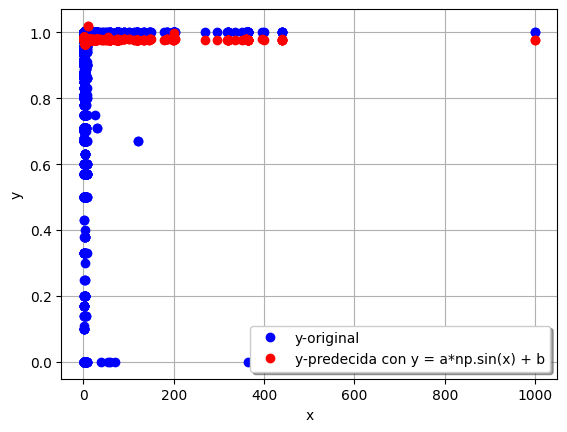

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original" , color= "blue")
plt.plot(x, y_pred2, 'bo', label="y-predecida con y = a*np.tan(x) + b", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
#Correlación modelo lineal
corr2 = df['minimum_nights'].corr(df['host_response_rate'])  # correlación de Pearson entre ambas columnas
corr2

np.float64(0.009853584884769194)

In [195]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo2 = abs(r2_score(y, y_pred2) )
R2_Modelo2


0.0005523180814186457

In [196]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(abs(R2_Modelo2))
R

np.float64(0.023501448496180948)

In [212]:
%pip install jinja2



   -------------------- ------------------- 1/2 [jinja2]
   -------------------- ------------------- 1/2 [jinja2]
   -------------------- ------------------- 1/2 [jinja2]
   ---------------------------------------- 2/2 [jinja2]

Note: you may need to restart the kernel to use updated packages.


In [213]:
import pandas as pd
from IPython.display import display

# Resultados de tus modelos
data = {
    'Modelo': ['Modelo 1', 'Modelo 2'],
    'Variable dependiente': ['host_response_rate', 'host_response_rate'],
    'Variable independiente': ['minimum_nights', 'minimum_nights'],
    'Correlación (r)': [0.009853584884769194, 0.009853584884769194],
    'R²': [0.0025149608429028136, 0.0005523180814186457],
    'R': [0.05014938526944088, 0.023501448496180948]
}

# Crear DataFrame
tabla_resultados = pd.DataFrame(data)

# Mostrar la tabla
display(tabla_resultados.style.set_caption("Resumen de correlaciones y coeficientes de determinación"))


,Modelo,Variable dependiente,Variable independiente,Correlación (r),R²,R
0,Modelo 1,host_response_rate,minimum_nights,0.009854,0.002515,0.050149
1,Modelo 2,host_response_rate,minimum_nights,0.009854,0.000552,0.023501


**HOST ACCEPTANCE RATE**

Modelo 1

In [252]:
# Función cuadrática
def func3(x, a, b, c):
    return a*x**2 + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros3, covs3= curve_fit(func3, df['price'], df['host_acceptance_rate'])

In [253]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros3


array([8.86052653e-12, 1.47690850e-06, 9.31392541e-01])

In [247]:
# Predicciones
y_pred3 = func3(x, *parametros3)

In [248]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred3

,minimum_nights_avg_ntm
0,0.931734
1,0.931734
2,0.931734
3,0.931734
4,0.931734
...,...
26159,0.931734
26160,0.931734
26161,0.931734
26162,0.931734


C:\Users\sammm\AppData\Local\Temp\ipykernel_17336\1714282150.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
C:\Users\sammm\AppData\Local\Temp\ipykernel_17336\1714282150.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y-predecida con y = a*np.exp(-b*x) + c", color= "red")


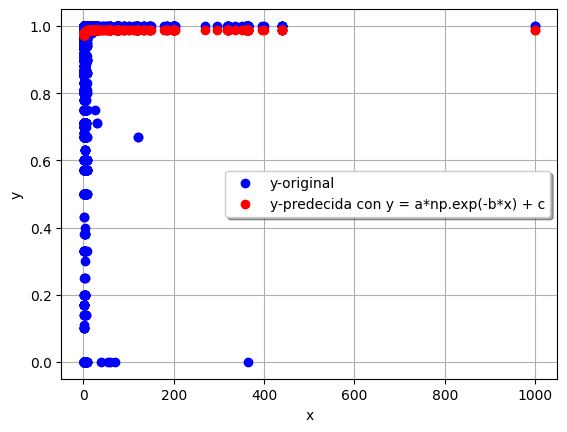

In [249]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred1,'bo', label="y-predecida con y = a*np.exp(-b*x) + c", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [250]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo3 = r2_score(y, y_pred3) 
R2_Modelo3 

-0.17923435739735027

In [251]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo3)
R

C:\Users\sammm\AppData\Local\Temp\ipykernel_17336\3094923844.py:2: RuntimeWarning: invalid value encountered in sqrt
  R = np.sqrt(R2_Modelo3)


np.float64(nan)

Modelo 2

In [236]:
# Función inversa
def func4(x, a):
    return 1/(a*x)


In [237]:
#Ajustamos los parámetros de la función curve_fit
parametros4, covs4= curve_fit(func4, df['host_response_rate'], df['host_acceptance_rate'])

C:\Users\sammm\AppData\Local\Temp\ipykernel_17336\3464409531.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros4, covs4= curve_fit(func4, df['host_response_rate'], df['host_acceptance_rate'])


In [238]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros4

array([1.])

In [239]:
# Predicciones
y_pred4 = func4(x, *parametros4)

In [240]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
y_pred4

,minimum_nights_avg_ntm
0,0.333333
1,1.000000
2,0.250000
3,0.333333
4,0.181818
...,...
26159,0.333333
26160,0.333333
26161,0.277778
26162,0.153846


C:\Users\sammm\AppData\Local\Temp\ipykernel_17336\3437298849.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original" , color= "blue")
C:\Users\sammm\AppData\Local\Temp\ipykernel_17336\3437298849.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred4, 'bo', label="y-predecida con y = 1/(a*x)", color= "red")


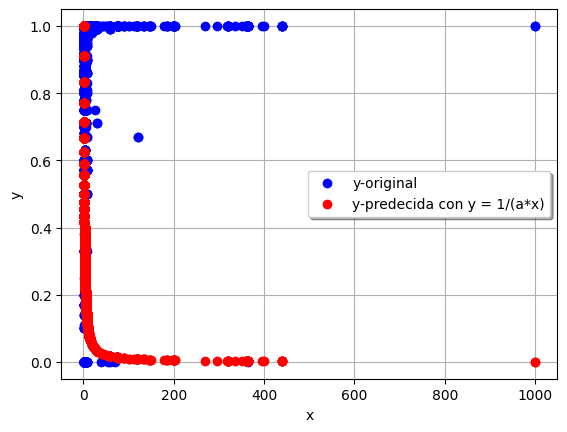

In [241]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original" , color= "blue")
plt.plot(x, y_pred4, 'bo', label="y-predecida con y = 1/(a*x)", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [242]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo4 = r2_score(y, y_pred4) 
R2_Modelo4

-31.804042204055463